In [4]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from spacy_spanish_lemmatizer import SpacyCustomLemmatizer
import pyLDAvis
import gensim
from gensim import corpora, similarities, models
from gensim.models.phrases import Phraser
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from tqdm import tqdm
import spacy_transformers
import torch
import torchvision

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
base = pd.read_excel('Base_Coyotaje.xlsx')
base

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,Spanish / Castilian,...,Disidente de...,https://twitter.com/Dukerosky,NaN,107.0,615.0,"Jan 20, 2021",00:05:00,Chihuahua,Chihuahua,NaN
1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,Spanish / Castilian,...,Orca,https://twitter.com/roger_orca,NaN,228.0,449.0,"Feb 2, 2021",14:35:00,Francisco Morazán,Tegucigalpa,NaN
2,10-Mar-2021 11:07AM,NaN,https://twitter.com/JosefinGarciah/statuses/13...,NaN,RT @anamesiac: EL TRAFICO DE MIGRANTES DE BACH...,Twitter,@josefingarciah,Mexico,NaN,Spanish / Castilian,...,Josefinagarciah,https://twitter.com/JosefinGarciah,"Traductora, inglés/alemán, ex analista riesgo....",5164.0,5190.0,"Mar 10, 2021",11:07:00,Sonora,Providencia,NaN
3,26-Mar-2021 09:25PM,NaN,https://twitter.com/Charly_Mancia/statuses/137...,NaN,QT @amatevos: RT @Beatrizze01: ¿Qué hay detrás...,Twitter,@charly_mancia,El Salvador,NaN,Spanish / Castilian,...,Charly,https://twitter.com/Charly_Mancia,"Agradezco tu buen gusto, pero por el momento n...",3204.0,4383.0,"Mar 26, 2021",21:25:00,NaN,NaN,NaN
4,26-Mar-2021 05:21PM,NaN,https://twitter.com/barnet_martinez/statuses/1...,NaN,QT @amatevos: RT @Beatrizze01: ¿Qué hay detrás...,Twitter,@barnet_martinez,El Salvador,NaN,Spanish / Castilian,...,Barnet Martinez,https://twitter.com/barnet_martinez,NaN,128.0,443.0,"Mar 26, 2021",17:21:00,San Salvador,San Salvador,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Oct-2020 06:01PM,NaN,http://twitter.com/impactocamargo/statuses/131...,NaN,VIDEO: Nueva caravana migrante irrumpe en Guat...,Twitter,@impactocamargo,Mexico,NaN,Spanish / Castilian,...,ImpactoNoticias,http://www.twitter.com/impactocamargo,"Periodismo Digital de Camargo, Chihuahua",652.0,117.0,"Oct 1, 2020",18:01:00,Chihuahua,Chihuahua,NaN
19996,01-Oct-2020 03:01AM,NaN,https://twitter.com/RogeEcoloco/statuses/13115...,NaN,RT @dw_espanol: Nueva #CaravanaMigrante sale d...,Twitter,@rogeecoloco,Mexico,NaN,Spanish / Castilian,...,RogeEcoloco,https://twitter.com/RogeEcoloco,"♻️trabajando por la Pachamama, tratando de ser...",287.0,930.0,"Oct 1, 2020",03:01:00,Quintana Roo,Cancún,NaN
19997,01-Oct-2020 01:57PM,NaN,https://twitter.com/ElManagerChef/statuses/131...,NaN,QT @ContraC_HN: RT @Tormentaggedon: Se acabaro...,Twitter,@elmanagerchef,El Salvador,NaN,Spanish / Castilian,...,José Vela 🔥✊🏾,https://twitter.com/ElManagerChef,Candidato a diputado por @NuestroTiempoSV | Fu...,10434.0,1050.0,"Oct 1, 2020",13:57:00,Cuscatlán,San Martín,NaN
19998,01-Oct-2020 04:22PM,NaN,http://twitter.com/Jon32962747/statuses/131177...,NaN,RT @Factor4_GT: #CaravanaMigrante El Comisiona...,Twitter,@Jon32962747,Mexico,NaN,English,...,"Jona,sullivan",http://www.twitter.com/Jon32962747,"ni de izquierda ni derecha, ni feminista, ni m...",43.0,779.0,"Oct 1, 2020",16:22:00,Tamaulipas,Vamos Tamaulipas,NaN


# Análisis de la base sin limpieza

In [6]:
series_a_str = str(base["Hit Sentence"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Hit Sentence', '')

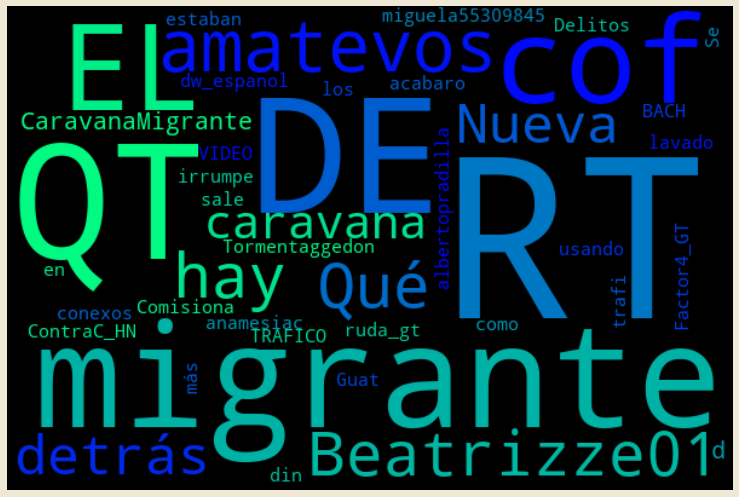

In [7]:
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

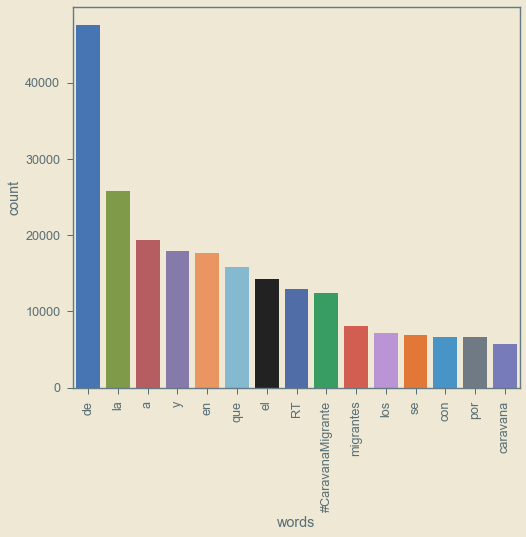

In [8]:
#Contador general
contador = Counter(" ".join(base["Hit Sentence"]).split()).most_common(15)
x_df = pd.DataFrame(contador, columns=("words","count"))
g = sns.barplot(x = 'words', y = 'count', data = x_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

# Análisis con limpieza básica de la submuestra de Coyotaje

In [9]:
df = base
# Remover el QT y el RTs por contexto
def meltwater_QT_and_RT_remover(df):
    df['RT'] = df['Hit Sentence'].astype(str).str.find('RT')
    df['QT'] = df['Hit Sentence'].astype(str).str.find('QT')
    # Remove authors
    df['Snippet'] = df['Hit Sentence'].replace(r'@\w+', '', regex=True)
    # Manejar QT con RT
    'QT @author: ... RT @author2: ...'
    df.loc[(df['RT'] != -1) & (df['QT'] != -1), 'Snippet'] = df['Snippet'].str.extract(r'QT(.*)RT')[0]
    # Manejar QT sin RT
    'QT @author: ...'
    df.loc[(df['RT'] == -1) & (df['QT'] != -1), 'Snippet'] = df['Snippet'].str.extract(r'QT(.*)\;')[0]
    # Manejar RT sin QT
    'RT @author: ...'
    df.loc[(df['RT'] != -1) & (df['QT'] == -1), 'Snippet'] = df['Snippet'].replace(r'[RT].*$', '', regex = True)
    df['Snippet'] = df['Snippet'].replace(r'\:', '', regex=True)
    df['Snippet'] = df['Snippet'].replace("", np.nan)
    df['Snippet'] = df['Snippet'].replace('  ', np.nan)
    print(df[['QT','RT','Hit Sentence','Snippet']].head(25))
    df = df.dropna(subset=['Snippet'])
    df = df.drop(columns=['RT', 'QT'])
    return df
df = meltwater_QT_and_RT_remover(df)

    QT  RT                                       Hit Sentence  \
0   -1  -1  @ruda_gt cof cof los estaban usando como trafi...   
1   -1  -1  @miguela55309845 Delitos conexos lavado de din...   
2   -1   0  RT @anamesiac: EL TRAFICO DE MIGRANTES DE BACH...   
3    0  14  QT @amatevos: RT @Beatrizze01: ¿Qué hay detrás...   
4    0  14  QT @amatevos: RT @Beatrizze01: ¿Qué hay detrás...   
5   -1  -1  NACIONALES | La Comisión de Seguridad de @Asam...   
6   -1  -1  Comisión de Seguridad de @AsambleaSV recibió a...   
7   -1   0  RT @ChatoVargasSV: Presidente pasa del vergonz...   
8   -1  -1  Presidente pasa del vergonzoso Tercer País Seg...   
9   -1  -1  @CRAMSV nombre Carlos ese veto favorece Naiyd ...   
10  -1  -1  Mientras el Éxodo de personas Hacia USA Sea UN...   
11  -1  -1  Hoy en el #NoticentroSN La policía ejecuta otr...   
12  -1  -1  @hotnredys Y terminamos en una red de trafico ...   
13  -1   0  RT @Beatrizze01: ¿Qué hay detrás de la negativ...   
14  -1  -1  @ExpPolitica 

In [10]:
seed(1)
values = list(set(randint(0, 22255, 500)))

temp=df.loc[df.index.isin(values)]
print(len(temp))
del values

temp.head()

154


,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags,Snippet
20,07-Mar-2021 12:02PM,NaN,https://twitter.com/torruso/statuses/136862307...,NaN,@elaccidito @cesarramoskris @_andreacasta @mil...,Twitter,@torruso,El Salvador,NaN,Spanish / Castilian,...,https://twitter.com/torruso,un joven idealista y con esperanzas en el futuro,288.0,1194.0,"Mar 7, 2021",12:02:00,San Salvador,Apopa,NaN,Osea que si hoy en dia el mayor recurso...
42,28-Mar-2021 10:44AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,FALSO: EL presidente. No se debe criminalizar ...,Twitter,@chatovargassv,El Salvador,NaN,Spanish / Castilian,...,https://twitter.com/ChatoVargasSV,"Salvadoreño, Militar retirado, Diputado de ARE...",9638.0,380.0,"Mar 28, 2021",10:44:00,San Salvador,San Salvador,NaN,FALSO EL presidente. No se debe criminalizar l...
144,10-Oct-2020 08:56PM,NaN,https://twitter.com/1995_DiegoAnaya/statuses/1...,NaN,@alejandrosol34 @nayibbukele Bueno eso pensamo...,Twitter,@1995_diegoanaya,El Salvador,NaN,Spanish / Castilian,...,https://twitter.com/1995_DiegoAnaya,RRII. Politica. Geopolitica. El Salvador 🇸🇻,27.0,90.0,"Oct 10, 2020",20:56:00,NaN,NaN,NaN,"Bueno eso pensamos ahora, pero en el apogueo..."
243,03-Oct-2020 01:13PM,NaN,http://twitter.com/ROLFICOMPAFUEGO/statuses/13...,NaN,@INAMI_mx APLICAR MEDIDAS MAS FUERTES PARA EL ...,Twitter,@ROLFICOMPAFUEGO,Mexico,NaN,Spanish / Castilian,...,http://www.twitter.com/ROLFICOMPAFUEGO,"México,MANGAS COLORADAS #SONORA #ANTIFA #SOMOS...",1136.0,2251.0,"Oct 3, 2020",13:13:00,México,NaN,NaN,APLICA
373,25-Jul-2020 01:19PM,NaN,https://twitter.com/avictoriam/statuses/128709...,NaN,QT @m_ebrard: Se llama trafico de personas ; A...,Twitter,@avictoriam,Mexico,NaN,Spanish / Castilian,...,https://twitter.com/avictoriam,"Artist and Designer, Food Design Speaker \nMex...",762.0,1197.0,"Jul 25, 2020",13:19:00,San Luis Potosí,Hernández,NaN,Se llama trafico de personas


In [11]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
df['Clean_Text'] = df['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Remover mayúsculas de inicio de texto
df['Clean_Text'] = df['Clean_Text'].map(lambda x: x.lower())
df=df.reset_index(drop=True)
df=df.reset_index()
df = df.astype({"Clean_Text": str})
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber'])
#spanish_stopwords.extend(usuarios)
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')
df['Clean_Text_no_stopwords'] = df['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))
df.head(11)

<>:16: DeprecationWarning: invalid escape sequence \.
<>:16: DeprecationWarning: invalid escape sequence \.
C:\Users\JOSE\AppData\Local\Temp/ipykernel_13588/950629650.py:16: DeprecationWarning: invalid escape sequence \.
  df['Clean_Text'] = df['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))


,index,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags,Snippet,Clean_Text,Clean_Text_no_stopwords
0,0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,...,107.0,615.0,"Jan 20, 2021",00:05:00,Chihuahua,Chihuahua,NaN,cof cof los estaban usando como trafico de pe...,cof cof los estaban usando como trafico de per...,cof cof usando trafico personas polleros
1,1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,...,228.0,449.0,"Feb 2, 2021",14:35:00,Francisco Morazán,Tegucigalpa,NaN,"Delitos conexos lavado de dinero, trafico de ...",delitos conexos lavado de dinero trafico de il...,delitos conexos lavado dinero trafico ilegal a...
2,2,16-Mar-2021 01:10PM,NaN,https://twitter.com/RedInfoSol/statuses/137188...,NaN,NACIONALES | La Comisión de Seguridad de @Asam...,Twitter,@redinfosol,El Salvador,NaN,...,209.0,437.0,"Mar 16, 2021",13:10:00,NaN,NaN,NaN,NACIONALES | La Comisión de Seguridad de reci...,nacionales | la comisión de seguridad de recib...,nacionales comisión seguridad recibió represen...
3,3,16-Mar-2021 11:29AM,NaN,https://twitter.com/TN21sv/statuses/1371861314...,NaN,Comisión de Seguridad de @AsambleaSV recibió a...,Twitter,@tn21sv,El Salvador,NaN,...,459087.0,462.0,"Mar 16, 2021",11:29:00,NaN,NaN,NaN,Comisión de Seguridad de recibió a representa...,comisión de seguridad de recibió a representan...,comisión seguridad recibió representantes obje...
4,4,30-Mar-2021 08:45AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,Presidente pasa del vergonzoso Tercer País Seg...,Twitter,@chatovargassv,El Salvador,NaN,...,9643.0,380.0,"Mar 30, 2021",08:45:00,San Salvador,San Salvador,NaN,Presidente pasa del vergonzoso Tercer País Seg...,presidente pasa del vergonzoso tercer país seg...,presidente pasa vergonzoso tercer país seguro ...
5,5,26-Mar-2021 02:46PM,NaN,https://twitter.com/Luisalb81718402/statuses/1...,NaN,@CRAMSV nombre Carlos ese veto favorece Naiyd ...,Twitter,@luisalb81718402,El Salvador,NaN,...,17.0,114.0,"Mar 26, 2021",14:46:00,San Salvador,Ilopango,NaN,nombre Carlos ese veto favorece Naiyd tiene u...,nombre carlos ese veto favorece naiyd tiene un...,nombre carlos veto favorece naiyd ministro min...
6,6,26-Mar-2021 11:29AM,NaN,https://twitter.com/antonioguez60/statuses/137...,NaN,Mientras el Éxodo de personas Hacia USA Sea UN...,Twitter,@antonioguez60,Mexico,NaN,...,1946.0,1474.0,"Mar 26, 2021",11:29:00,Mexico City,Mexico City,NaN,Mientras el Éxodo de personas Hacia USA Sea UN...,mientras el éxodo de personas hacia usa sea un...,mientras éxodo personas hacia usa gran negocio...
7,7,18-Mar-2021 12:08PM,NaN,https://twitter.com/sonora969/statuses/1372595...,NaN,Hoy en el #NoticentroSN La policía ejecuta otr...,Twitter,@sonora969,Guatemala,NaN,...,833083.0,48.0,"Mar 18, 2021",12:08:00,NaN,NaN,NaN,Hoy en el #NoticentroSN La policía ejecuta otr...,hoy en el la policía ejecuta otros operativos ...,hoy policía ejecuta operativos casos corrupció...
8,8,03-Mar-2021 06:34PM,NaN,https://twitter.com/GabrielloFiori/statuses/13...,NaN,@hotnredys Y terminamos en una red de trafico ...,Twitter,@gabriellofiori,Honduras,NaN,...,288.0,242.0,"Mar 3, 2021",18:34:00,NaN,NaN,NaN,Y terminamos en una red de trafico de persona...,y terminamos en una red de trafico de personas...,terminamos red trafico personas jalo
9,9,20-Mar-2021 09:56PM,NaN,https://twitter.com/Mamyaustriia588/statuses/1...,NaN,"@ExpPolitica vigilar22 vigilar3(1,111,333) que...",Twitter,@mamyaustriia588,Mexico,NaN,...,1.0,1136.0,"Mar 20, 2021",21:56:00,México,Naucalpan de Juárez,NaN,"vigilar22 vigilar3(1,111,333) que - no sean '...",vigilar22 vigilar3(11133) que - no sean ' roba...,vigilar22 vigilar3(11133) no robados salgan pa...


In [12]:
df['Clean_Text_no_stopwords']=df['Clean_Text_no_stopwords'].str.strip()
df['Clean_Text_no_stopwords'] = df['Clean_Text_no_stopwords'].replace("", np.nan)
df = df.dropna(subset=['Clean_Text_no_stopwords'])
df['Clean_Text']=df['Clean_Text'].str.strip()
df['Clean_Text'] = df['Clean_Text'].replace("", np.nan)
df = df.dropna(subset=['Clean_Text'])
series_a_str = str(df["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
df

,index,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags,Snippet,Clean_Text,Clean_Text_no_stopwords
0,0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,...,107.0,615.0,"Jan 20, 2021",00:05:00,Chihuahua,Chihuahua,NaN,cof cof los estaban usando como trafico de pe...,cof cof los estaban usando como trafico de per...,cof cof usando trafico personas polleros
1,1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,...,228.0,449.0,"Feb 2, 2021",14:35:00,Francisco Morazán,Tegucigalpa,NaN,"Delitos conexos lavado de dinero, trafico de ...",delitos conexos lavado de dinero trafico de il...,delitos conexos lavado dinero trafico ilegal a...
2,2,16-Mar-2021 01:10PM,NaN,https://twitter.com/RedInfoSol/statuses/137188...,NaN,NACIONALES | La Comisión de Seguridad de @Asam...,Twitter,@redinfosol,El Salvador,NaN,...,209.0,437.0,"Mar 16, 2021",13:10:00,NaN,NaN,NaN,NACIONALES | La Comisión de Seguridad de reci...,nacionales | la comisión de seguridad de recib...,nacionales comisión seguridad recibió represen...
3,3,16-Mar-2021 11:29AM,NaN,https://twitter.com/TN21sv/statuses/1371861314...,NaN,Comisión de Seguridad de @AsambleaSV recibió a...,Twitter,@tn21sv,El Salvador,NaN,...,459087.0,462.0,"Mar 16, 2021",11:29:00,NaN,NaN,NaN,Comisión de Seguridad de recibió a representa...,comisión de seguridad de recibió a representan...,comisión seguridad recibió representantes obje...
4,4,30-Mar-2021 08:45AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,Presidente pasa del vergonzoso Tercer País Seg...,Twitter,@chatovargassv,El Salvador,NaN,...,9643.0,380.0,"Mar 30, 2021",08:45:00,San Salvador,San Salvador,NaN,Presidente pasa del vergonzoso Tercer País Seg...,presidente pasa del vergonzoso tercer país seg...,presidente pasa vergonzoso tercer país seguro ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,6994,25-Sep-2020 11:59PM,NaN,https://twitter.com/vrolokvi/statuses/13097192...,NaN,QT @vrolokvi: @VanGelsinger @RafaelLoretdeM1 h...,Twitter,@vrolokvi,Mexico,NaN,...,600.0,430.0,"Sep 25, 2020",23:59:00,Guanajuato,Sarabia,NaN,https//t.co/Im5qxrIfI3 ; VIENE OTRA CARAV...,viene otra caravana de migrantes llega en oct ...,viene caravana migrantes llega oct 2020 sur gu...
6995,6995,25-Sep-2020 11:52PM,NaN,https://twitter.com/vrolokvi/statuses/13097174...,NaN,QT @vrolokvi: @Misa_Michonne GENTE COMPARTAN. ...,Twitter,@vrolokvi,Mexico,NaN,...,600.0,430.0,"Sep 25, 2020",23:52:00,Guanajuato,Sarabia,NaN,GENTE COMPARTAN. VIENEN MÁS MIGRANTES INVAS...,gente compartan vienen más migrantes invasores...,gente compartan vienen migrantes invasores lle...
6996,6996,25-Sep-2020 11:47PM,NaN,https://twitter.com/vrolokvi/statuses/13097161...,NaN,QT @vrolokvi: @Lauraresendizv https://t.co/Im5...,Twitter,@vrolokvi,Mexico,NaN,...,600.0,430.0,"Sep 25, 2020",23:47:00,Guanajuato,Sarabia,NaN,https//t.co/Im5qxrIfI3 ; VIENE OTRA CARAVA...,viene otra caravana de migrantes llega en oct ...,viene caravana migrantes llega oct 2020 sur gu...
6997,6997,04-Oct-2020 04:27PM,NaN,https://twitter.com/ilzitabonita/statuses/1312...,NaN,QT @radioamericahn: ¿Se disolvió la caravana? ...,Twitter,@ilzitabonita,Honduras,NaN,...,1305.0,945.0,"Oct 4, 2020",16:27:00,Olancho,NaN,NaN,¿Se disolvió la caravana?,se disolvió la caravana,disolvió caravana


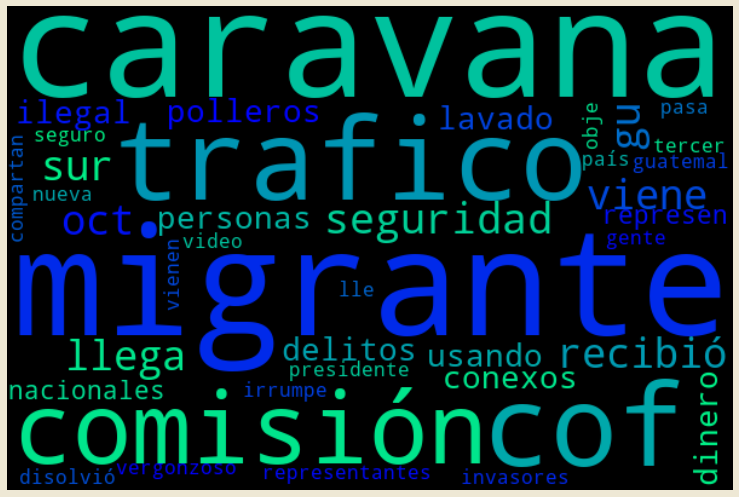

In [13]:
# Nube de palabras general sin stopwords
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

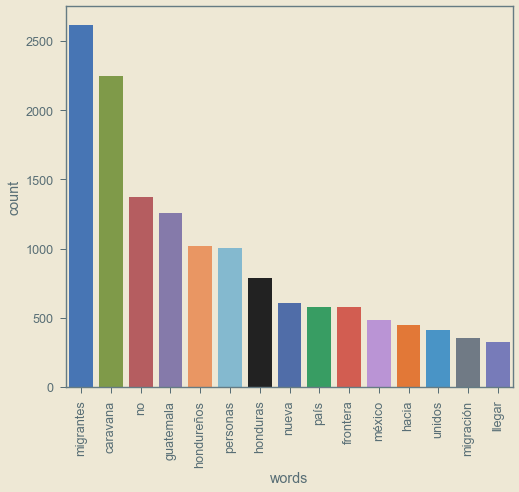

In [14]:
#Contador general sin stopwords
contador = Counter(" ".join(df["Clean_Text_no_stopwords"]).split()).most_common(15)
x_df = pd.DataFrame(contador, columns=("words","count"))
g = sns.barplot(x = 'words', y = 'count', data = x_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

In [15]:
nlp = spacy.load("es_dep_news_trf", exclude=["ner", "parser", "lemmatizer"])
lemmatizer_spa = SpacyCustomLemmatizer()
nlp.add_pipe("spanish_lemmatizer", name = 'lemmatizer', after = 'attribute_ruler')
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
#Vemos cuales son los componentes del pipeline
print(nlp.pipe_names)
#Aplicamos el pipe a cada objeto de nuestra lista de tweets
print('---------SPACY-----------')
docs = list()
sentences = df.Clean_Text.to_list()
for doc in tqdm(nlp.pipe(sentences), total=len(sentences)):
    docs.append(doc)

['transformer', 'morphologizer', 'attribute_ruler', 'lemmatizer']
---------SPACY-----------


100%|██████████| 6702/6702 [29:15<00:00,  3.82it/s]  


In [16]:
print('---------TOKENIZATION-----------')
tokens=[]
for doc in docs:
    tokens.append([(token.text) for token in doc])

tokens=np.array(tokens)
tokens=pd.DataFrame(tokens).reset_index()
tokens.columns=['index', 'tokens']

tokens.head()
print('---------POS-----------')
pos=[]
for doc in docs:
    pos.append([(token.text, token.pos_) for token in doc])

pos=np.array(pos)
pos=pd.DataFrame(pos).reset_index()
pos.columns=['index', 'pos']
df=pd.merge(df, tokens, how='inner', on='index')
df=pd.merge(df, pos, how='inner', on='index')
print('---------STOPWORDS-----------')
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber'])
#spanish_stopwords.extend(usuarios)
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')
# ,'venezolano', 'venezolanos', 'venezolana', 'venezolanas', 'veneco', 'veneca', 'venecos', 'venecas'
%time df['words']=df['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() and token.lower() not in spanish_stopwords and len(token)>1])
#N-GRAMS
tokens = df['words'].tolist()
bigram_model = gensim.models.phrases.Phrases(tokens, min_count=5, threshold=20)
trigram_model = gensim.models.phrases.Phrases(bigram_model[tokens], min_count=2, threshold=20)
tokens = list(trigram_model[bigram_model[tokens]])
print('---------N-GRAMS-----------')
print(trigram_model[bigram_model[tokens[0]]])
print('---------LEMMATIZER-----------')
lemma=[]
for doc in docs:
    lemma.append([(token.lemma_) for token in doc])
data_lemmatized = lemma
lemma=np.array(lemma)
lemma=pd.DataFrame(lemma).reset_index()
lemma.columns=['index', 'lemmatized']

print('---------Datos lemmatized-----------')
print(lemma[:1])

#MERGE LISTS INTO DF
df=pd.merge(df, lemma, how='inner', on='index')
df=df.drop(['index'], axis=1)

print('---------STOPWORDS-----------')
%time df['lem_words']=df['lemmatized'].map(lambda tokens: [token.lower() for token in tokens if token.lower() not in spanish_stopwords and len(token)>1])

print('--------BASE-FINAL--------')
df.head(11)

C:\Users\JOSE\AppData\Local\Temp/ipykernel_13588/2116287285.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tokens=np.array(tokens)


---------TOKENIZATION-----------
---------POS-----------
---------STOPWORDS-----------


C:\Users\JOSE\AppData\Local\Temp/ipykernel_13588/2116287285.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pos=np.array(pos)


Wall time: 327 ms
---------N-GRAMS-----------
['cof', 'cof', 'usando', 'trafico_personas', 'polleros']
---------LEMMATIZER-----------
---------Datos lemmatized-----------
   index                                         lemmatized
0      0  [cof, cof, los, estaban, usar, como, trafico, ...
---------STOPWORDS-----------


C:\Users\JOSE\AppData\Local\Temp/ipykernel_13588/2116287285.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lemma=np.array(lemma)


Wall time: 353 ms
--------BASE-FINAL--------


,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,City,Document Tags,Snippet,Clean_Text,Clean_Text_no_stopwords,tokens,pos,words,lemmatized,lem_words
0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,Spanish / Castilian,...,Chihuahua,NaN,cof cof los estaban usando como trafico de pe...,cof cof los estaban usando como trafico de per...,cof cof usando trafico personas polleros,"[cof, cof, los, estaban, usando, como, trafico...","[(cof, PROPN), (cof, PROPN), (los, PRON), (est...","[cof, cof, usando, trafico, personas, polleros]","[cof, cof, los, estaban, usar, como, trafico, ...","[cof, cof, usar, trafico, persona, pollero]"
1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,Spanish / Castilian,...,Tegucigalpa,NaN,"Delitos conexos lavado de dinero, trafico de ...",delitos conexos lavado de dinero trafico de il...,delitos conexos lavado dinero trafico ilegal a...,"[delitos, conexos, lavado, de, dinero, trafico...","[(delitos, NOUN), (conexos, ADJ), (lavado, ADJ...","[delitos, conexos, lavado, dinero, trafico, il...","[delito, conexos, lavado, de, dinero, trafico,...","[delito, conexos, lavado, dinero, trafico, ile..."
2,16-Mar-2021 01:10PM,NaN,https://twitter.com/RedInfoSol/statuses/137188...,NaN,NACIONALES | La Comisión de Seguridad de @Asam...,Twitter,@redinfosol,El Salvador,NaN,Spanish / Castilian,...,NaN,NaN,NACIONALES | La Comisión de Seguridad de reci...,nacionales | la comisión de seguridad de recib...,nacionales comisión seguridad recibió represen...,"[nacionales, |, la, comisión, de, seguridad, d...","[(nacionales, ADJ), (|, PUNCT), (la, DET), (co...","[nacionales, comisión, seguridad, recibió, rep...","[nacional, |, el, comisión, de, seguridad, de,...","[nacional, comisión, seguridad, recibir, repre..."
3,16-Mar-2021 11:29AM,NaN,https://twitter.com/TN21sv/statuses/1371861314...,NaN,Comisión de Seguridad de @AsambleaSV recibió a...,Twitter,@tn21sv,El Salvador,NaN,Spanish / Castilian,...,NaN,NaN,Comisión de Seguridad de recibió a representa...,comisión de seguridad de recibió a representan...,comisión seguridad recibió representantes obje...,"[comisión, de, seguridad, de, recibió, a, repr...","[(comisión, PROPN), (de, ADP), (seguridad, NOU...","[comisión, seguridad, recibió, representantes,...","[comisión, de, seguridad, de, recibir, a, repr...","[comisión, seguridad, recibir, representante, ..."
4,30-Mar-2021 08:45AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,Presidente pasa del vergonzoso Tercer País Seg...,Twitter,@chatovargassv,El Salvador,NaN,Spanish / Castilian,...,San Salvador,NaN,Presidente pasa del vergonzoso Tercer País Seg...,presidente pasa del vergonzoso tercer país seg...,presidente pasa vergonzoso tercer país seguro ...,"[presidente, pasa, del, vergonzoso, tercer, pa...","[(presidente, NOUN), (pasa, VERB), (del, ADP),...","[presidente, pasa, vergonzoso, tercer, país, s...","[presidente, pasa, del, vergonzoso, tercer, pa...","[presidente, pasa, vergonzoso, tercer, país, s..."
5,26-Mar-2021 02:46PM,NaN,https://twitter.com/Luisalb81718402/statuses/1...,NaN,@CRAMSV nombre Carlos ese veto favorece Naiyd ...,Twitter,@luisalb81718402,El Salvador,NaN,Spanish / Castilian,...,Ilopango,NaN,nombre Carlos ese veto favorece Naiyd tiene u...,nombre carlos ese veto favorece naiyd tiene un...,nombre carlos veto favorece naiyd ministro min...,"[nombre, carlos, ese, veto, favorece, naiyd, t...","[(nombre, NOUN), (carlos, PROPN), (ese, DET), ...","[nombre, carlos, veto, favorece, naiyd, minist...","[nombre, carlos, ese, veto, favorecer, naiyd, ...","[nombre, carlos, veto, favorecer, naiyd, tener..."
6,26-Mar-2021 11:29AM,NaN,https://twitter.com/antonioguez60/statuses/137...,NaN,Mientras el Éxodo de personas Hacia USA Sea UN...,Twitter,@antonioguez60,Me

In [17]:
print(data_lemmatized[:1])
print(df.loc[0, 'lem_words'])
len(spanish_stopwords)

[['cof', 'cof', 'los', 'estaban', 'usar', 'como', 'trafico', 'de', 'persona', 'pollero']]
['cof', 'cof', 'usar', 'trafico', 'persona', 'pollero']


313

# LDA

In [18]:
data_lemmatized=list(df['lem_words'])
dictionary = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
dictionary.save('tweets_x.dict');
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('tweets_x.mm', corpus)
corpora.SvmLightCorpus.serialize('tweets_x.svmlight', corpus)
corpora.BleiCorpus.serialize('tweets_x.lda-c', corpus)
corpora.LowCorpus.serialize('tweets_x.low', corpus)
print('--------CORPUS----------')
print(corpus[:1])
##Then the dictionary and corpus can be used to train using LDA
np.random.seed(123456)
mm = corpora.MmCorpus('tweets_x.mm')
num_topics=10
%time lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=num_topics, update_every=0, passes=10, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary.keys()))

--------CORPUS----------
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1)]]
Wall time: 16.7 s


In [19]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cof', 2), ('persona', 1), ('pollero', 1), ('trafico', 1), ('usar', 1)]]

In [20]:
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.048*"no" + 0.019*"si" + 0.017*"migrante" + 0.016*"pasar" + 0.013*"tener" '
  '+ 0.012*"dejar" + 0.010*"querer" + 0.009*"hijo" + 0.009*"persona" + '
  '0.008*"pollero"'),
 (1,
  '0.024*"persona" + 0.019*"san" + 0.018*"pedro" + 0.018*"sula" + '
  '0.014*"mexico" + 0.013*"salir" + 0.013*"llegar" + 0.011*"caravana" + '
  '0.011*"migrante" + 0.011*"niño"'),
 (2,
  '0.040*"migrante" + 0.036*"caravana" + 0.026*"guatemala" + 0.017*"fuerza" + '
  '0.017*"no" + 0.013*"nueva" + 0.011*"uso" + 0.010*"hondureño" + '
  '0.010*"gobierno" + 0.009*"país"'),
 (3,
  '0.034*"migrante" + 0.032*"caravana" + 0.022*"guatemala" + 0.018*"hondureño" '
  '+ 0.016*"hacia" + 0.015*"persona" + 0.015*"honduras" + 0.012*"frontera" + '
  '0.011*"mil" + 0.011*"país"'),
 (4,
  '0.039*"guatemala" + 0.036*"migrante" + 0.027*"caravana" + 0.020*"frontera" '
  '+ 0.014*"the" + 0.009*"honduras" + 0.009*"hondureños" + 0.009*"méxico" + '
  '0.008*"hondureño" + 0.007*"persona"'),
 (5,
  '0.034*"no" + 0.029*"persona" + 0.

In [22]:
vis = pyLDAvis.gensim_models.prepare(topic_model=lda, corpus=corpus, dictionary=dictionary)
pyLDAvis.display(vis)

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [23]:
pyLDAvis.save_html(vis, 'ldax.html')

In [24]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
with np.errstate(invalid='ignore'):
    coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.008765365257785

Coherence Score:  0.348567934210499


In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=num_topics, update_every=0, passes=10, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary.keys()))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
# Can take a long time to run.
%time model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=mm, texts=data_lemmatized, start=4, limit=20, step=2)

Wall time: 3min 31s


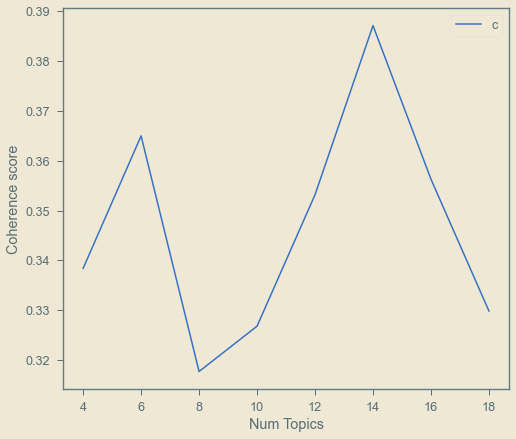

In [27]:
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

Num Topics = 4  has Coherence Value of 0.34
Num Topics = 6  has Coherence Value of 0.36
Num Topics = 8  has Coherence Value of 0.32
Num Topics = 10  has Coherence Value of 0.33
Num Topics = 12  has Coherence Value of 0.35
Num Topics = 14  has Coherence Value of 0.39
Num Topics = 16  has Coherence Value of 0.36
Num Topics = 18  has Coherence Value of 0.33


In [29]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.030*"persona" + 0.026*"migrante" + 0.021*"caravana" + 0.014*"frontera" + '
  '0.013*"no" + 0.011*"guatemala" + 0.009*"nacional" + 0.008*"trafico" + '
  '0.008*"migración" + 0.006*"mil"'),
 (1,
  '0.040*"no" + 0.015*"persona" + 0.013*"tener" + 0.013*"hacer" + 0.011*"país" '
  '+ 0.010*"si" + 0.010*"derecho" + 0.008*"migrante" + 0.007*"gobierno" + '
  '0.007*"migrar"'),
 (2,
  '0.043*"migrante" + 0.027*"caravana" + 0.020*"guatemala" + 0.010*"no" + '
  '0.010*"chiquimula" + 0.010*"persona" + 0.009*"hondureños" + 0.009*"país" + '
  '0.008*"policía" + 0.007*"ejército"'),
 (3,
  '0.039*"migrante" + 0.037*"caravana" + 0.019*"guatemala" + 0.019*"hondureño" '
  '+ 0.016*"frontera" + 0.015*"nueva" + 0.015*"honduras" + 0.013*"salir" + '
  '0.013*"llegar" + 0.013*"rumbo"'),
 (4,
  '0.030*"no" + 0.023*"migrante" + 0.018*"caravana" + 0.015*"guatemala" + '
  '0.011*"persona" + 0.008*"the" + 0.008*"méxico" + 0.008*"pasar" + '
  '0.008*"gobierno" + 0.007*"país"'),
 (5,
  '0.066*"migrante" + 0

In [30]:
visx = pyLDAvis.gensim_models.prepare(topic_model=optimal_model, corpus=corpus, dictionary=dictionary, mds='mmds')
pyLDAvis.display(visx)

In [31]:
# Archivo HTML
pyLDAvis.save_html(visx, 'ldax2.html')

In [32]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [3:33:25<00:00, 23.71s/it]  


In [33]:
tabla_tunning = pd.read_csv('lda_tuning_results.csv')
tabla_tunning = tabla_tunning.sort_values(by = 'Coherence')
tabla_tunning

,Validation_Set,Topics,Alpha,Beta,Coherence
28,75% Corpus,2,asymmetric,0.9099999999999999,0.253857
85,75% Corpus,4,asymmetric,0.01,0.289911
119,75% Corpus,5,asymmetric,symmetric,0.290914
63,75% Corpus,4,0.01,0.9099999999999999,0.303434
359,100% Corpus,4,asymmetric,symmetric,0.303496
...,...,...,...,...,...
153,75% Corpus,7,0.01,0.9099999999999999,0.504187
128,75% Corpus,6,0.31,0.9099999999999999,0.505959
518,100% Corpus,10,0.31,0.9099999999999999,0.512306
448,100% Corpus,7,asymmetric,0.9099999999999999,0.521769


In [34]:
tabla_tunning.to_excel('mejor_modelo.xlsx')

In [36]:


#corpus = corpora.MmCorpus('tweets_x.mm')
#dictionary = corpora.Dictionary('tweets_x.dict')
# EL mejor modelo
eta = 0.9099999999999999
lda_final_model = gensim.models.LdaMulticore(corpus=mm,
                                             id2word=dictionary,
                                             num_topics=7,
                                             random_state=100,
                                             chunksize=100,
                                             passes=10,
                                             alpha=0.01,
                                             eta=eta)

[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

pprint(lda_final_model.print_topics())
doc_lda = lda_final_model[corpus]

visxx = pyLDAvis.gensim_models.prepare(topic_model=lda_final_model, corpus=corpus, dictionary=dictionary)
pyLDAvis.display(visxx)


[(0,
  '0.002*"pollero" + 0.001*"biden" + 0.001*"narco" + 0.001*"hoy" + '
  '0.001*"mandar" + 0.001*"pobre" + 0.001*"triste" + 0.001*"brasil" + '
  '0.001*"ver" + 0.001*"dólar"'),
 (1,
  '0.058*"migrante" + 0.051*"caravana" + 0.024*"guatemala" + '
  '0.013*"hondureños" + 0.012*"honduras" + 0.011*"nueva" + 0.010*"frontera" + '
  '0.010*"persona" + 0.009*"hondureño" + 0.008*"méxico"'),
 (2,
  '0.002*"migrante" + 0.002*"pollero" + 0.002*"no" + 0.002*"comisionado" + '
  '0.002*"mayor" + 0.001*"migración" + 0.001*"declaración" + 0.001*"capturar" '
  '+ 0.001*"aquí" + 0.001*"hernández"'),
 (3,
  '0.004*"persona" + 0.003*"pollero" + 0.003*"mexico" + 0.003*"derecho" + '
  '0.003*"migrante" + 0.003*"rescatar" + 0.003*"trafico" + 0.002*"niño" + '
  '0.002*"usar" + 0.002*"brazo"'),
 (4,
  '0.006*"hondo" + 0.005*"chiquimula" + 0.005*"vado" + 0.004*"migrante" + '
  '0.003*"kilómetro" + 0.003*"sido" + 0.003*"177" + 0.003*"nacional" + '
  '0.003*"carretera" + 0.003*"migración"'),
 (5,
  '0.032*"no" +

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [37]:
pyLDAvis.save_html(visxx, 'ldax3.html')

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_final_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_final_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
with np.errstate(invalid='ignore'):
    coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.590375070483352

Coherence Score:  0.5525539649813628


In [39]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_final_model, corpus=corpus, texts=df['Snippet'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9901,"persona, pollero, mexico, derecho, migrante, r...",cof cof los estaban usando como trafico de pe...
1,1,5.0,0.9950,"no, persona, si, tener, país, hacer, decir, go...","Delitos conexos lavado de dinero, trafico de ..."
2,2,5.0,0.9965,"no, persona, si, tener, país, hacer, decir, go...",NACIONALES | La Comisión de Seguridad de reci...
3,3,5.0,0.8369,"no, persona, si, tener, país, hacer, decir, go...",Comisión de Seguridad de recibió a representa...
4,4,5.0,0.9973,"no, persona, si, tener, país, hacer, decir, go...",Presidente pasa del vergonzoso Tercer País Seg...
5,5,3.0,0.6892,"persona, pollero, mexico, derecho, migrante, r...",nombre Carlos ese veto favorece Naiyd tiene u...
6,6,5.0,0.9969,"no, persona, si, tener, país, hacer, decir, go...",Mientras el Éxodo de personas Hacia USA Sea UN...
7,7,5.0,0.7989,"no, persona, si, tener, país, hacer, decir, go...",Hoy en el #NoticentroSN La policía ejecuta otr...
8,8,5.0,0.9882,"no, persona, si, tener, país, hacer, decir, go...",Y terminamos en una red de trafico de persona...
9,9,5.0,0.9970,"no, persona, si, tener, país, hacer, decir, go...","vigilar22 vigilar3(1,111,333) que - no sean '..."


In [40]:
df_dominant_topic.to_excel('Topico_dominante_por_frase_snippet.xlsx')

In [41]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9960,"pollero, biden, narco, hoy, mandar, pobre, tri...",#Ahora | Por la llegada de la caravana de migr...
1,1.0,0.9979,"migrante, caravana, guatemala, hondureños, hon...",Hoy tengo el gusto de impartir una conferencia...
2,2.0,0.9973,"migrante, pollero, no, comisionado, mayor, mig...",Algunas personas de la #CaravanaMigrante están...
3,3.0,0.9976,"persona, pollero, mexico, derecho, migrante, r...","Nueva caravana, inicia la presión de López a..."
4,4.0,0.9972,"hondo, chiquimula, vado, migrante, kilómetro, ...",#Covid19 en los países de #Sica. Crece la #xen...


In [42]:
sent_topics_sorteddf_mallet.to_excel('tweets_representativos_por_topico_snippet.xlsx')

In [43]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"persona, pollero, mexico, derecho, migrante, r...",143.0,0.0223
1.0,5.0,"no, persona, si, tener, país, hacer, decir, go...",3478.0,0.5428
2.0,5.0,"no, persona, si, tener, país, hacer, decir, go...",173.0,0.0270
3.0,5.0,"no, persona, si, tener, país, hacer, decir, go...",207.0,0.0323
4.0,5.0,"no, persona, si, tener, país, hacer, decir, go...",232.0,0.0362
...,...,...,...,...
6403.0,1.0,"migrante, caravana, guatemala, hondureños, hon...",NaN,NaN
6404.0,1.0,"migrante, caravana, guatemala, hondureños, hon...",NaN,NaN
6405.0,1.0,"migrante, caravana, guatemala, hondureños, hon...",NaN,NaN
6406.0,1.0,"migrante, caravana, guatemala, hondureños, hon...",NaN,NaN


In [44]:
df_dominant_topics.to_excel('distribución_de_topicos_a_traves_de_documentos.xlsx')

# Regular Expressions Coyotaje


In [47]:
df['venezolano'] = df.Clean_Text.str.findall(r'(veneco|veneca|venezolan|cham)[A-Za-z]*')
df['venezolano'] = df.venezolano.map(lambda x: x!=[])
df['venezolano'] = np.where(df['venezolano'], 1, 0)

df['nicaraguenses'] = df.Clean_Text.str.findall(r'(nica|nicaraguense)[A-Za-z]*')
df['nicaraguenses'] = df.nicaraguenses.map(lambda x: x!=[])
df['nicaraguenses'] = np.where(df['nicaraguenses'], 1, 0)

df['salvadoreño'] = df.Clean_Text.str.findall(r'(guanaco|salvadoreño|guanaca|salvadoreña)[A-Za-z]*')
df['salvadoreño'] = df.salvadoreño.map(lambda x: x!=[])
df['salvadoreño'] = np.where(df['salvadoreño'], 1, 0)

df['hondureño'] = df.Clean_Text.str.findall(r'(catracho|hondureño|hondureña|catracha|caravana)[A-Za-z]*')
df['hondureño'] = df.hondureño.map(lambda x: x!=[])
df['hondureño'] = np.where(df['hondureño'], 1, 0)

df['guatemalteco'] = df.Clean_Text.str.findall(r'(chapin|chapín|chapina|guatemalteco|guatemalteca)[A-Za-z]*')
df['guatemalteco'] = df.guatemalteco.map(lambda x: x!=[])
df['guatemalteco'] = np.where(df['guatemalteco'], 1, 0)

df['mexicano'] = df.Clean_Text.str.findall(r'(mexicano|mexicana|méxico|mexico|poch)[A-Za-z]*')
df['mexicano'] = df.mexicano.map(lambda x: x!=[])
df['mexicano'] = np.where(df['mexicano'], 1, 0)

df['coyotaje'] = df.Clean_Text.str.findall(r'(carava|coyot|fronter|ilegales|cruza|trafic|poller|chiqui|ingres|llega|venir|rumb)[A-Za-z]*')
df['coyotaje'] = df.coyotaje.map(lambda x: x!=[])
df['coyotaje'] = np.where(df['coyotaje'], 1, 0)

df['sd'] = np.where((df['hondureño']==0) & (df['venezolano']==0) & (df['nicaraguenses']==0) & (df['salvadoreño']==0) & (df['mexicano']==0) & (df['guatemalteco']==0), 1, 0)

df.head()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,lemmatized,lem_words,venezolano,nicaraguenses,salvadoreño,hondureño,guatemalteco,mexicano,coyotaje,sd
0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,Spanish / Castilian,...,"[cof, cof, los, estaban, usar, como, trafico, ...","[cof, cof, usar, trafico, persona, pollero]",0,0,0,0,0,0,1,1
1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,Spanish / Castilian,...,"[delito, conexos, lavado, de, dinero, trafico,...","[delito, conexos, lavado, dinero, trafico, ile...",0,0,0,0,0,0,1,1
2,16-Mar-2021 01:10PM,NaN,https://twitter.com/RedInfoSol/statuses/137188...,NaN,NACIONALES | La Comisión de Seguridad de @Asam...,Twitter,@redinfosol,El Salvador,NaN,Spanish / Castilian,...,"[nacional, |, el, comisión, de, seguridad, de,...","[nacional, comisión, seguridad, recibir, repre...",0,0,0,0,0,0,1,1
3,16-Mar-2021 11:29AM,NaN,https://twitter.com/TN21sv/statuses/1371861314...,NaN,Comisión de Seguridad de @AsambleaSV recibió a...,Twitter,@tn21sv,El Salvador,NaN,Spanish / Castilian,...,"[comisión, de, seguridad, de, recibir, a, repr...","[comisión, seguridad, recibir, representante, ...",0,0,0,0,0,0,1,1
4,30-Mar-2021 08:45AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,Presidente pasa del vergonzoso Tercer País Seg...,Twitter,@chatovargassv,El Salvador,NaN,Spanish / Castilian,...,"[presidente, pasa, del, vergonzoso, tercer, pa...","[presidente, pasa, vergonzoso, tercer, país, s...",0,0,0,0,0,0,1,1


# Gráficas coyotaje

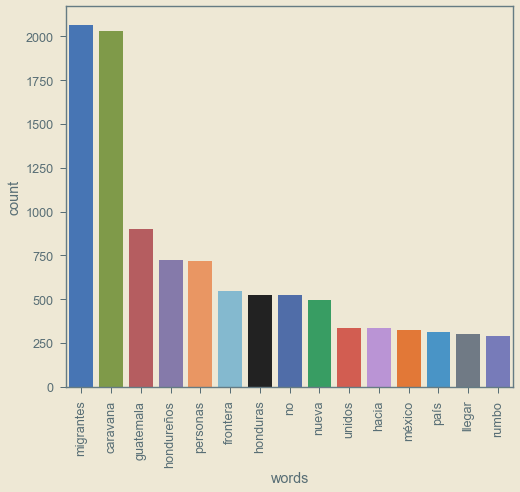

In [49]:
base_coyotaje = df[df['coyotaje'] == 1]
#Contador general coyotaje
contador = Counter(" ".join(base_coyotaje['Clean_Text_no_stopwords']).split()).most_common(15)
x_df = pd.DataFrame(contador, columns=("words","count"))
g = sns.barplot(x = 'words', y = 'count', data = x_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

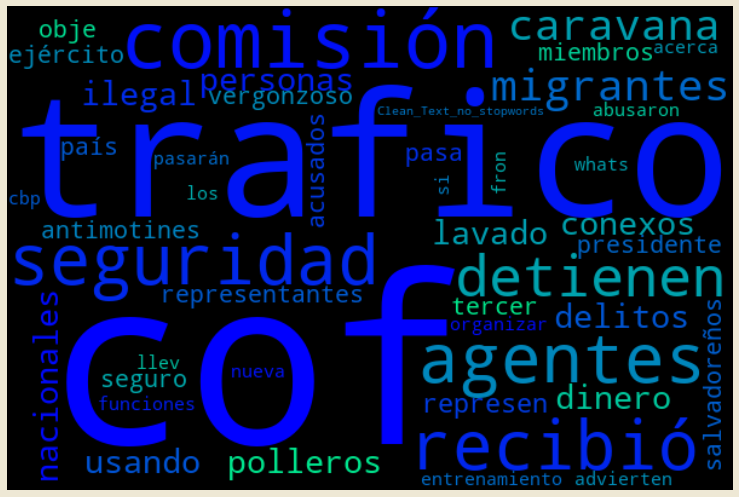

In [50]:
series_a_str = str(base_coyotaje['Clean_Text_no_stopwords'])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('coyotaje', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general sin stopwords
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [51]:
base_coyotaje

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,lemmatized,lem_words,venezolano,nicaraguenses,salvadoreño,hondureño,guatemalteco,mexicano,coyotaje,sd
0,20-Jan-2021 12:05AM,NaN,https://twitter.com/Dukerosky/statuses/1351772...,NaN,@ruda_gt cof cof los estaban usando como trafi...,Twitter,@dukerosky,Mexico,NaN,Spanish / Castilian,...,"[cof, cof, los, estaban, usar, como, trafico, ...","[cof, cof, usar, trafico, persona, pollero]",0,0,0,0,0,0,1,1
1,02-Feb-2021 02:35PM,NaN,https://twitter.com/roger_orca/statuses/135670...,NaN,@miguela55309845 Delitos conexos lavado de din...,Twitter,@roger_orca,Honduras,NaN,Spanish / Castilian,...,"[delito, conexos, lavado, de, dinero, trafico,...","[delito, conexos, lavado, dinero, trafico, ile...",0,0,0,0,0,0,1,1
2,16-Mar-2021 01:10PM,NaN,https://twitter.com/RedInfoSol/statuses/137188...,NaN,NACIONALES | La Comisión de Seguridad de @Asam...,Twitter,@redinfosol,El Salvador,NaN,Spanish / Castilian,...,"[nacional, |, el, comisión, de, seguridad, de,...","[nacional, comisión, seguridad, recibir, repre...",0,0,0,0,0,0,1,1
3,16-Mar-2021 11:29AM,NaN,https://twitter.com/TN21sv/statuses/1371861314...,NaN,Comisión de Seguridad de @AsambleaSV recibió a...,Twitter,@tn21sv,El Salvador,NaN,Spanish / Castilian,...,"[comisión, de, seguridad, de, recibir, a, repr...","[comisión, seguridad, recibir, representante, ...",0,0,0,0,0,0,1,1
4,30-Mar-2021 08:45AM,NaN,https://twitter.com/ChatoVargasSV/statuses/137...,NaN,Presidente pasa del vergonzoso Tercer País Seg...,Twitter,@chatovargassv,El Salvador,NaN,Spanish / Castilian,...,"[presidente, pasa, del, vergonzoso, tercer, pa...","[presidente, pasa, vergonzoso, tercer, país, s...",0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6399,16-Jan-2021 04:28AM,NaN,https://twitter.com/AztecaNoticiaGT/statuses/1...,NaN,"Antimotines, agentes de la @PNCdeGuatemala y m...",Twitter,@aztecanoticiagt,Guatemala,NaN,Spanish / Castilian,...,"[mhoni, vidente, predecir, contagio, de, covid...","[mhoni, vidente, predecir, contagio, covid, do...",0,0,0,1,0,0,1,0
6404,15-Jan-2021 07:18PM,NaN,https://twitter.com/raftulum/statuses/13502509...,NaN,Detienen a salvadoreños acusados de organizar ...,Twitter,@raftulum,Guatemala,NaN,Spanish / Castilian,...,"[gente, compartir, venir, más, migrante, invas...","[gente, compartir, venir, migrante, invasor, l...",0,0,1,1,0,0,1,0
6405,14-Oct-2020 01:52PM,NaN,https://twitter.com/ContraC_HN/statuses/131645...,NaN,Los agentes de CBP abusaron de las funciones d...,Twitter,@contrac_hn,Honduras,NaN,Spanish / Castilian,...,"[venir, otro, caravana, de, migrante, llega, e...","[venir, caravana, migrante, llega, oct, 2020, ...",0,0,0,1,0,0,1,0
6406,17-Jan-2021 01:08PM,NaN,https://twitter.com/HoyMismoTSI/statuses/13508...,NaN,#HoyMismo #Honduras |“No pasarán -los migrante...,Twitter,@hoymismotsi,Honduras,NaN,Spanish / Castilian,...,"[se, disolver, el, caravana]","[disolver, caravana]",0,0,0,1,0,1,1,0
